1. Importing Modules and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
     

In [3]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. EDA - Understanding and Cleaning Data

In [4]:
print(df.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [5]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]


In [6]:
selected_features = df[['annual_income_(k$)', 'spending_score_(1-100)']]


3. Model Training

In [7]:
scaler_standard = StandardScaler()
scaled_features = scaler_standard.fit_transform(selected_features)


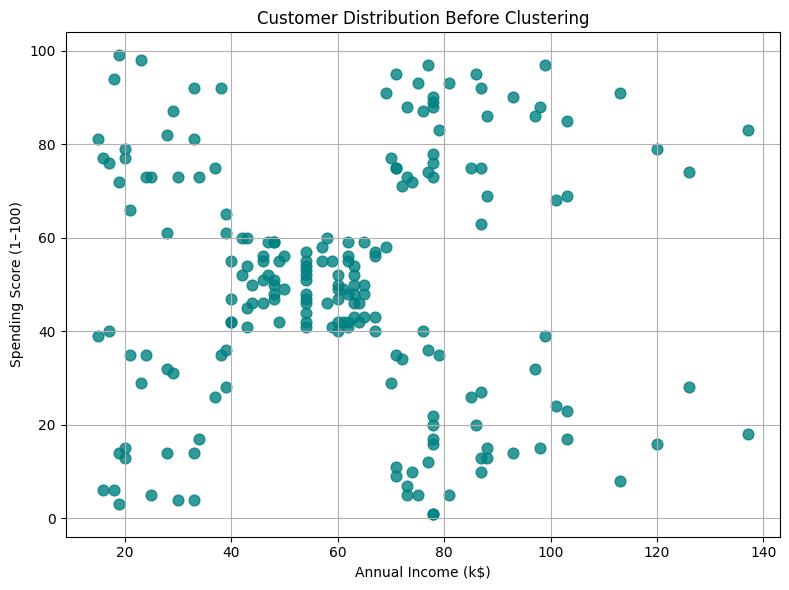

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(
    selected_features['annual_income_(k$)'],
    selected_features['spending_score_(1-100)'],
    color='teal',
    s=60,
    alpha=0.8
)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.title('Customer Distribution Before Clustering')
plt.grid(visible=True)
plt.tight_layout()
plt.show()


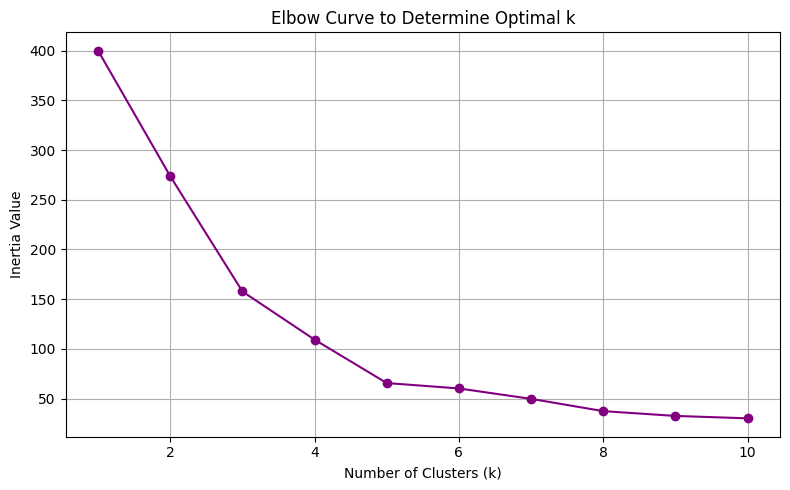

In [9]:
inertia_scores = []
cluster_options = range(1, 11)

for num_clusters in cluster_options:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(scaled_features)
    inertia_scores.append(kmeans_model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_options, inertia_scores, marker='o', linestyle='-', color='purple')
plt.title("Elbow Curve to Determine Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia Value")
plt.grid(visible=True)
plt.tight_layout()
plt.show()


In [10]:
optimal_k = 5
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = final_kmeans.fit_predict(scaled_features)


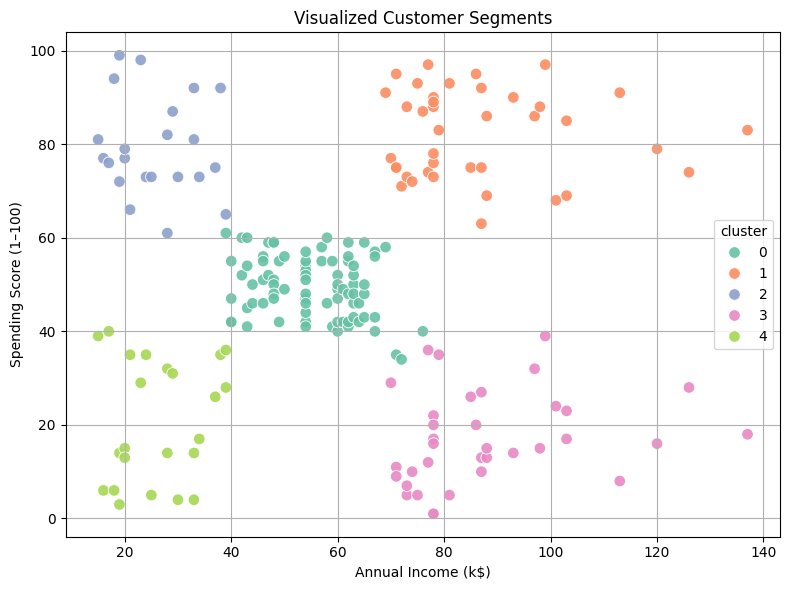

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='annual_income_(k$)',
    y='spending_score_(1-100)',
    hue='cluster',
    palette='Set2',
    s=70,
    alpha=0.9
)
plt.title("Visualized Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.grid(visible=True)
plt.tight_layout()
plt.show()


Bonus - DBSCAN

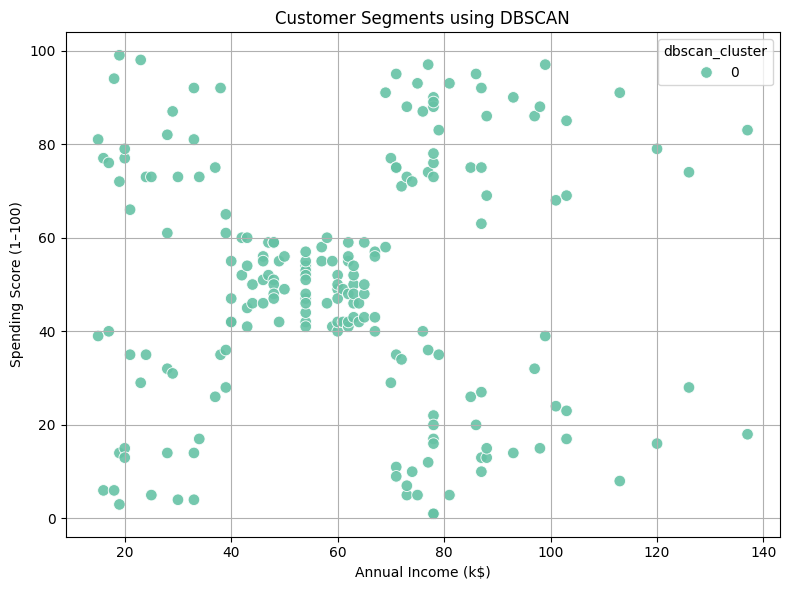

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Feature selection
X = df[['annual_income_(k$)', 'spending_score_(1-100)']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# DBSCAN clustering
db = DBSCAN(eps=0.8, min_samples=5)
df['dbscan_cluster'] = db.fit_predict(X_scaled)

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='annual_income_(k$)',
    y='spending_score_(1-100)',
    hue='dbscan_cluster',
    palette='Set2',
    s=70,
    alpha=0.9
)
plt.title("Customer Segments using DBSCAN")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
cluster_summary = df.groupby('cluster')[['annual_income_(k$)', 'spending_score_(1-100)']].mean()
print(cluster_summary)


         annual_income_(k$)  spending_score_(1-100)
cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043
